In [1]:
import numpy as np

from keras.models import Sequential, Input, Model
from keras.layers import Dense
from keras.datasets import mnist

In [2]:
(X_train, _),(X_test, _) = mnist.load_data()

In [3]:
X_train = X_train.reshape(-1,28*28)/255.
X_test = X_test.reshape(-1,28*28)/255.

In [4]:
latent_dim = 32

In [5]:
input_ = Input(shape=X_train.shape[1:])
encoded = Dense(latent_dim,activation='relu')(input_)
decoded = Dense(X_train.shape[1],activation='sigmoid')(encoded)
autoencoder = Model(inputs=[input_],outputs=[decoded])

In [6]:
encoder = Model(inputs=[input_], outputs=[encoded])
encoded_input = Input(shape=(latent_dim,))
decoder_layer = autoencoder.layers[-1]

In [7]:
decoder = Model(inputs=[encoded_input], outputs=[decoder_layer(encoded_input)])

In [8]:
autoencoder.compile(loss='mean_squared_error',
                   optimizer='adam')

In [9]:
autoencoder.fit(X_train,
                X_train,
                epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_test,X_test))

Epoch 1/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1104 - val_loss: 0.0412
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0379 - val_loss: 0.0287
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0275 - val_loss: 0.0228
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0221 - val_loss: 0.0191
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0187 - val_loss: 0.0166
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0164 - val_loss: 0.0147
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0146 - val_loss: 0.0133
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0133 - val_loss: 0.0123
Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0118 - val_loss: 0.0112

In [10]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

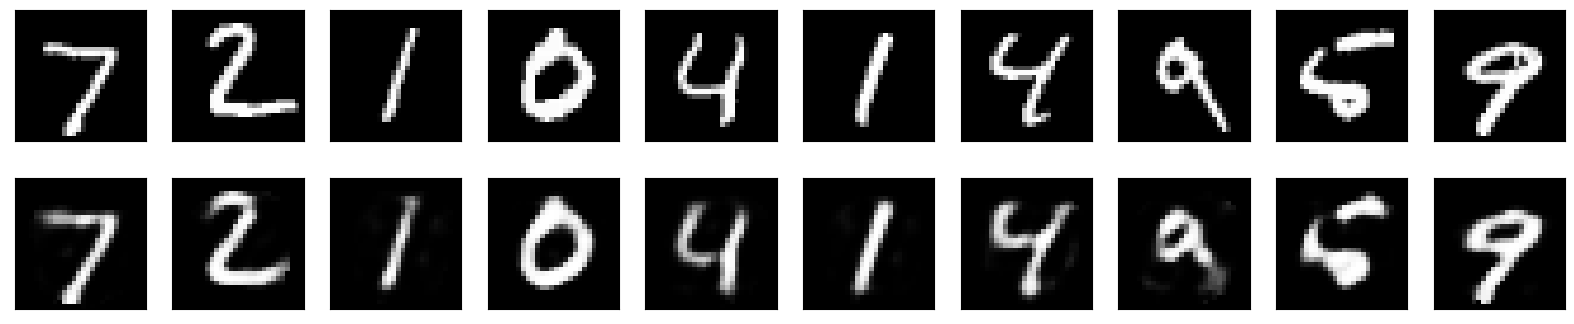

In [11]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
class Autoencoder(Model):
    def __init__(self,encoding_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim=latent_dim
        self.encoder = Sequential(
            [
                Dense(latent_dim,activation='relu')
            ]
        )
        self.decoder = Sequential(
            [
                Dense(X_train)                
            ]        
        )
        self.decoder = 
    def call(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
encoder = Sequential(
    [layer,
    layers,]
)